In [13]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [14]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [15]:
input_size = 784 # 28*28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [16]:
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)
test_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=False,
                                           transform=transforms.ToTensor(),
                                           )

In [17]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [18]:
examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


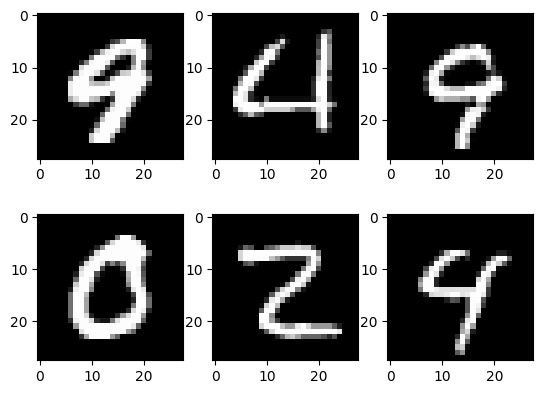

In [19]:
for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [20]:
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)
  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out

In [21]:
model = NeuralNet(input_size, hidden_size, num_classes)

In [22]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [23]:
n_total_steps = len(train_loader)

In [25]:
model.to(device)

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # 100, 1, 28, 28
    # 100, 784
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    # forward
    output = model(images)
    loss = criterion(output, labels)

    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i + 1) % 100 == 0:
      print(f"Epoch {epoch+1} / {num_epochs}, step {i+1} / {n_total_steps}, loss = {loss.item():.4f}")

Epoch 1 / 2, step 100 / 600, loss = 0.2878
Epoch 1 / 2, step 200 / 600, loss = 0.3711
Epoch 1 / 2, step 300 / 600, loss = 0.2193
Epoch 1 / 2, step 400 / 600, loss = 0.3616
Epoch 1 / 2, step 500 / 600, loss = 0.1391
Epoch 1 / 2, step 600 / 600, loss = 0.2209
Epoch 2 / 2, step 100 / 600, loss = 0.1399
Epoch 2 / 2, step 200 / 600, loss = 0.2213
Epoch 2 / 2, step 300 / 600, loss = 0.2756
Epoch 2 / 2, step 400 / 600, loss = 0.1205
Epoch 2 / 2, step 500 / 600, loss = 0.1051
Epoch 2 / 2, step 600 / 600, loss = 0.1142


In [26]:
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)

    _, predictions = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()

  acc = 100.0 * n_correct / n_samples
  print(f"Accuracy: {acc}")

Accuracy: 95.2
